# Exploring the data

In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

## From CSV to Pandas Dataframe

In [3]:
abs_path = "/home/dhruvkar/datasets/f110_dataset"#absolute path

In [4]:
csv_file_path = abs_path + "/data.csv"
steer_df = pd.read_csv(csv_file_path) #read csv w/ pandas + make dataframe
steer_df.head(4)

,Image,Steering angle,Speed
0,image000000.png,0.0,0.0
1,image000001.png,0.0,0.0
2,image000002.png,0.0,0.0
3,image000003.png,0.0,0.0


## Indexing into dataframe + converting to numpy

In [5]:
#Fix steering angle (left = negative) and speed (fwd = positive)
steer_df.iloc[:, 1] = steer_df.iloc[:, 1] * -1.0
steer_df.iloc[:, 2] = steer_df.iloc[:, 2] * -1.0

In [6]:
first_row = steer_df.loc[0]
first_image_name = steer_df.loc[0][0]
first_steer_angle = steer_df.loc[0][1]
first_speed = steer_df.loc[0][2]
print(first_image_name, first_steer_angle, first_speed)

image000000.png -0.0 -0.0


In [7]:
five_rows_df = steer_df.loc[4:10] #Get five rows as dataframe
print(five_rows_df)
print(type(five_rows_df))

              Image   Steering angle   Speed 
4   image000004.png             -0.0     -0.0
5   image000005.png             -0.0     -0.0
6   image000006.png             -0.0     -0.0
7   image000007.png             -0.0     -0.0
8   image000008.png             -0.0     -0.0
9   image000009.png             -0.0     -0.0
10  image000010.png             -0.0     -0.0
<class 'pandas.core.frame.DataFrame'>


In [8]:
five_rows_np = steer_df.loc[4:10].values #Get five rows as numpy array
print(five_rows_np)
print(five_rows_np.shape)

[['image000004.png' -0.0 -0.0]
 ['image000005.png' -0.0 -0.0]
 ['image000006.png' -0.0 -0.0]
 ['image000007.png' -0.0 -0.0]
 ['image000008.png' -0.0 -0.0]
 ['image000009.png' -0.0 -0.0]
 ['image000010.png' -0.0 -0.0]]
(7, 3)


## Viewing an image

image size is: (480, 640, 3)


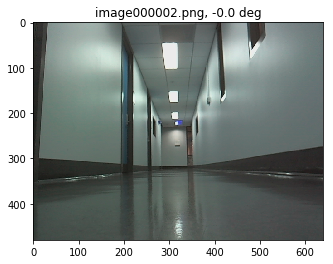

In [9]:
test_img_name = steer_df.loc[2][0] #arbitrarily pick 3rd image from dataframe
test_img_steer_angle = steer_df.loc[2][1] 

test_img = cv2.imread(abs_path + '/' + test_img_name) #read image with opencv
print("image size is:", test_img.shape) #H x W x (RGB)

#plt.imshow() to render image bc cv2.imshow() doesn't work in jupyter notebooks
plt.imshow(test_img)
plt.title(test_img_name + ', ' + str(test_img_steer_angle) + ' deg')
plt.show()

## Adding dope visualizations 

In [10]:
def visualize(df, idx):
    """
    Visualize an image w/ text + steering angle + speed + steering angle graphic
    """
    img_name, angle, speed = df.loc[idx][0], df.loc[idx][1], df.loc[idx][2]
    cv_img = cv2.imread(abs_path + '/' + img_name)
    
    #Put text in top left
    cv2.putText(cv_img, "angle: " + str(angle), (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(cv_img, "speed: " + str(speed), (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

    #Put steering graphic bottom middle
    cx, cy, r = 320, 520, 80
    cv2.circle(cv_img, (cx, cy), r, (255, 255, 255), 2) #big steering wheel
    
    #nasty radian -> x,y math
    x, y = (cx + r*math.cos(-1.0 * angle + math.pi/2)), (cy - r*math.sin(-1.0 * angle + math.pi/2))
    cv2.circle(cv_img, (int(x), int(y)), 10, (218, 165, 32), -1) #small angle on steering cmd

    #display image
    plt.imshow(cv_img)
    plt.show()

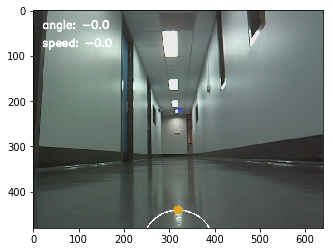

In [11]:
visualize(steer_df, 0)

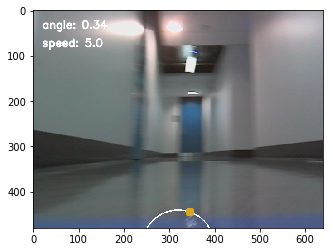

In [12]:
#Watch 1/10th of the important frames as a video
for i in range(int(0.1 * len(steer_df))):
    clear_output(True)
    visualize(steer_df, i+480)

## View Data Distribution

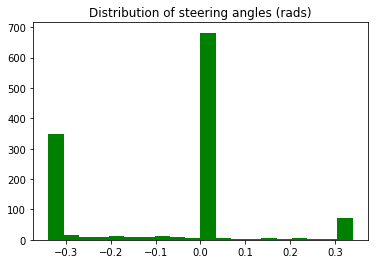

In [346]:
angle_column = steer_df.iloc[:, 1].values #get steering angle column
plt.hist(angle_column, 20, color='green')
plt.title("Distribution of steering angles (rads)")
plt.show()

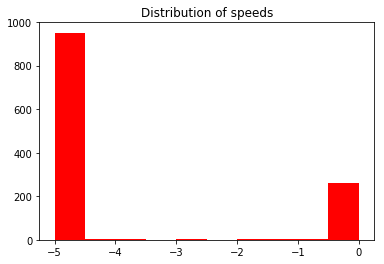

In [349]:
angle_column = steer_df.iloc[:, 2].values #get speed column
plt.hist(angle_column, 10, color='red')
plt.title("Distribution of speeds")
plt.show()